In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from core.data import load_from_kaggle


c:\Daten\Weiterbildung\Python\Portfolioprojekt\Test_Projekt\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_link = "shriyashjagtap/esg-and-financial-performance-dataset" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

100%|██████████| 379k/379k [00:00<00:00, 829kB/s]

Extracting files...
Loading dataset from C:\Users\orchi\.cache\kagglehub\datasets\shriyashjagtap\esg-and-financial-performance-dataset\versions\1 to ../data/raw\esg-and-financial-performance-dataset
Moving file: C:\Users\orchi\.cache\kagglehub\datasets\shriyashjagtap\esg-and-financial-performance-dataset\versions\1\company_esg_financial_dataset.csv to c:\Daten\Weiterbildung\Python\Portfolioprojekt\Test_Projekt\notebooks\../data/raw\esg-and-financial-performance-dataset
Files moved to '../data/raw\esg-and-financial-performance-dataset' directory.


In [3]:
files

['company_esg_financial_dataset.csv']

In [4]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

CompanyID CompanyName Industry         Region  Year  Revenue  ProfitMargin  \
0          1   Company_1   Retail  Latin America  2015    459.2           6.0   
1          1   Company_1   Retail  Latin America  2016    473.8           4.6   
2          1   Company_1   Retail  Latin America  2017    564.9           5.2   
3          1   Company_1   Retail  Latin America  2018    558.4           4.3   
4          1   Company_1   Retail  Latin America  2019    554.5           4.9   

   MarketCap  GrowthRate  ESG_Overall  ESG_Environmental  ESG_Social  \
0      337.5         NaN         57.0               60.7        33.5   
1      366.6         3.2         56.7               58.9        32.8   
2      313.4        19.2         56.5               57.6        34.0   
3      283.0        -1.1         58.0               62.3        33.4   
4      538.1        -0.7         56.6               63.7        30.0   

   ESG_Governance  CarbonEmissions  WaterUsage  EnergyConsumption  
0            76.8          35577.4     17788.7            71154.7  
1            78.5          37314.7     18657.4            74629.4  
2            77.8          45006.4     22503.2            90012.9  
3            78.3          42650.1     21325.1            85300.2  
4            76.1          41799.4     20899.7            83598.8

In [5]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2),
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(11000, 16)

'Description'

CompanyID      Year    Revenue  ProfitMargin  MarketCap  GrowthRate  \
count   11000.00  11000.00   11000.00      11000.00   11000.00    10000.00   
mean      500.50   2020.00    4670.85         10.90   13380.62        4.83   
std       288.69      3.16    9969.95          8.76   39922.87        9.42   
min         1.00   2015.00      35.90        -20.00       1.80      -36.00   
25%       250.75   2017.00     938.78          5.30    1098.52       -1.32   
50%       500.50   2020.00    1902.30         10.50    3096.45        4.90   
75%       750.25   2023.00    4342.62         16.30    9995.50       11.00   
max      1000.00   2025.00  180810.40         50.00  865271.70       38.00   

       ESG_Overall  ESG_Environmental  ESG_Social  ESG_Governance  \
count     11000.00           11000.00    11000.00        11000.00   
mean         54.62              56.42       55.66           51.77   
std          15.89              26.77       23.36           25.32   
min           6.30               0.00        0.00            0.00   
25%          44.10              34.70       37.60           30.78   
50%          54.60              55.60       55.15           52.10   
75%          65.60              79.00       73.80           73.00   
max          98.80             100.00      100.00          100.00   

       CarbonEmissions   WaterUsage  EnergyConsumption  
count     1.100000e+04     11000.00       1.100000e+04  
mean      1.271462e+06    560044.15       1.165839e+07  
std       5.067760e+06   1565686.22       5.095836e+07  
min       2.042200e+03      1021.10       5.105500e+03  
25%       1.228529e+05     64884.68       3.069161e+05  
50%       2.920735e+05    203880.45       1.221745e+06  
75%       7.407311e+05    525187.98       5.616437e+06  
max       1.741047e+08  52231416.40       1.741047e+09

'Duplicates'

np.int64(0)

Data Types  Missing Values  Unique Values  \
CompanyID              int64               0           1000   
CompanyName           object               0           1000   
Industry              object               0              9   
Region                object               0              7   
Year                   int64               0             11   
Revenue              float64               0           9965   
ProfitMargin         float64               0            536   
MarketCap            float64               0          10385   
GrowthRate           float64            1000            562   
ESG_Overall          float64               0            823   
ESG_Environmental    float64               0            991   
ESG_Social           float64               0            966   
ESG_Governance       float64               0            995   
CarbonEmissions      float64               0          10994   
WaterUsage           float64               0          10986   
EnergyConsumption    float64               0          10997   

                                             Sample Values  
CompanyID                                  [567, 552, 927]  
CompanyName        [Company_822, Company_700, Company_870]  
Industry             [Transportation, Finance, Healthcare]  
Region                   [Oceania, Latin America, Oceania]  
Year                                    [2023, 2021, 2015]  
Revenue                             [2948.1, 618.4, 415.2]  
ProfitMargin                            [13.0, 18.7, 11.9]  
MarketCap                        [6555.2, 12202.4, 6362.7]  
GrowthRate                               [8.9, 14.1, 13.1]  
ESG_Overall                             [47.8, 50.5, 67.3]  
ESG_Environmental                       [98.0, 40.1, 98.9]  
ESG_Social                               [7.1, 56.1, 59.6]  
ESG_Governance                           [67.2, 7.6, 35.0]  
CarbonEmissions              [7673227.0, 114804.8, 2469.4]  
WaterUsage                   [17147.1, 302645.1, 132282.8]  
EnergyConsumption         [616259.5, 825320.4, 74207848.7]

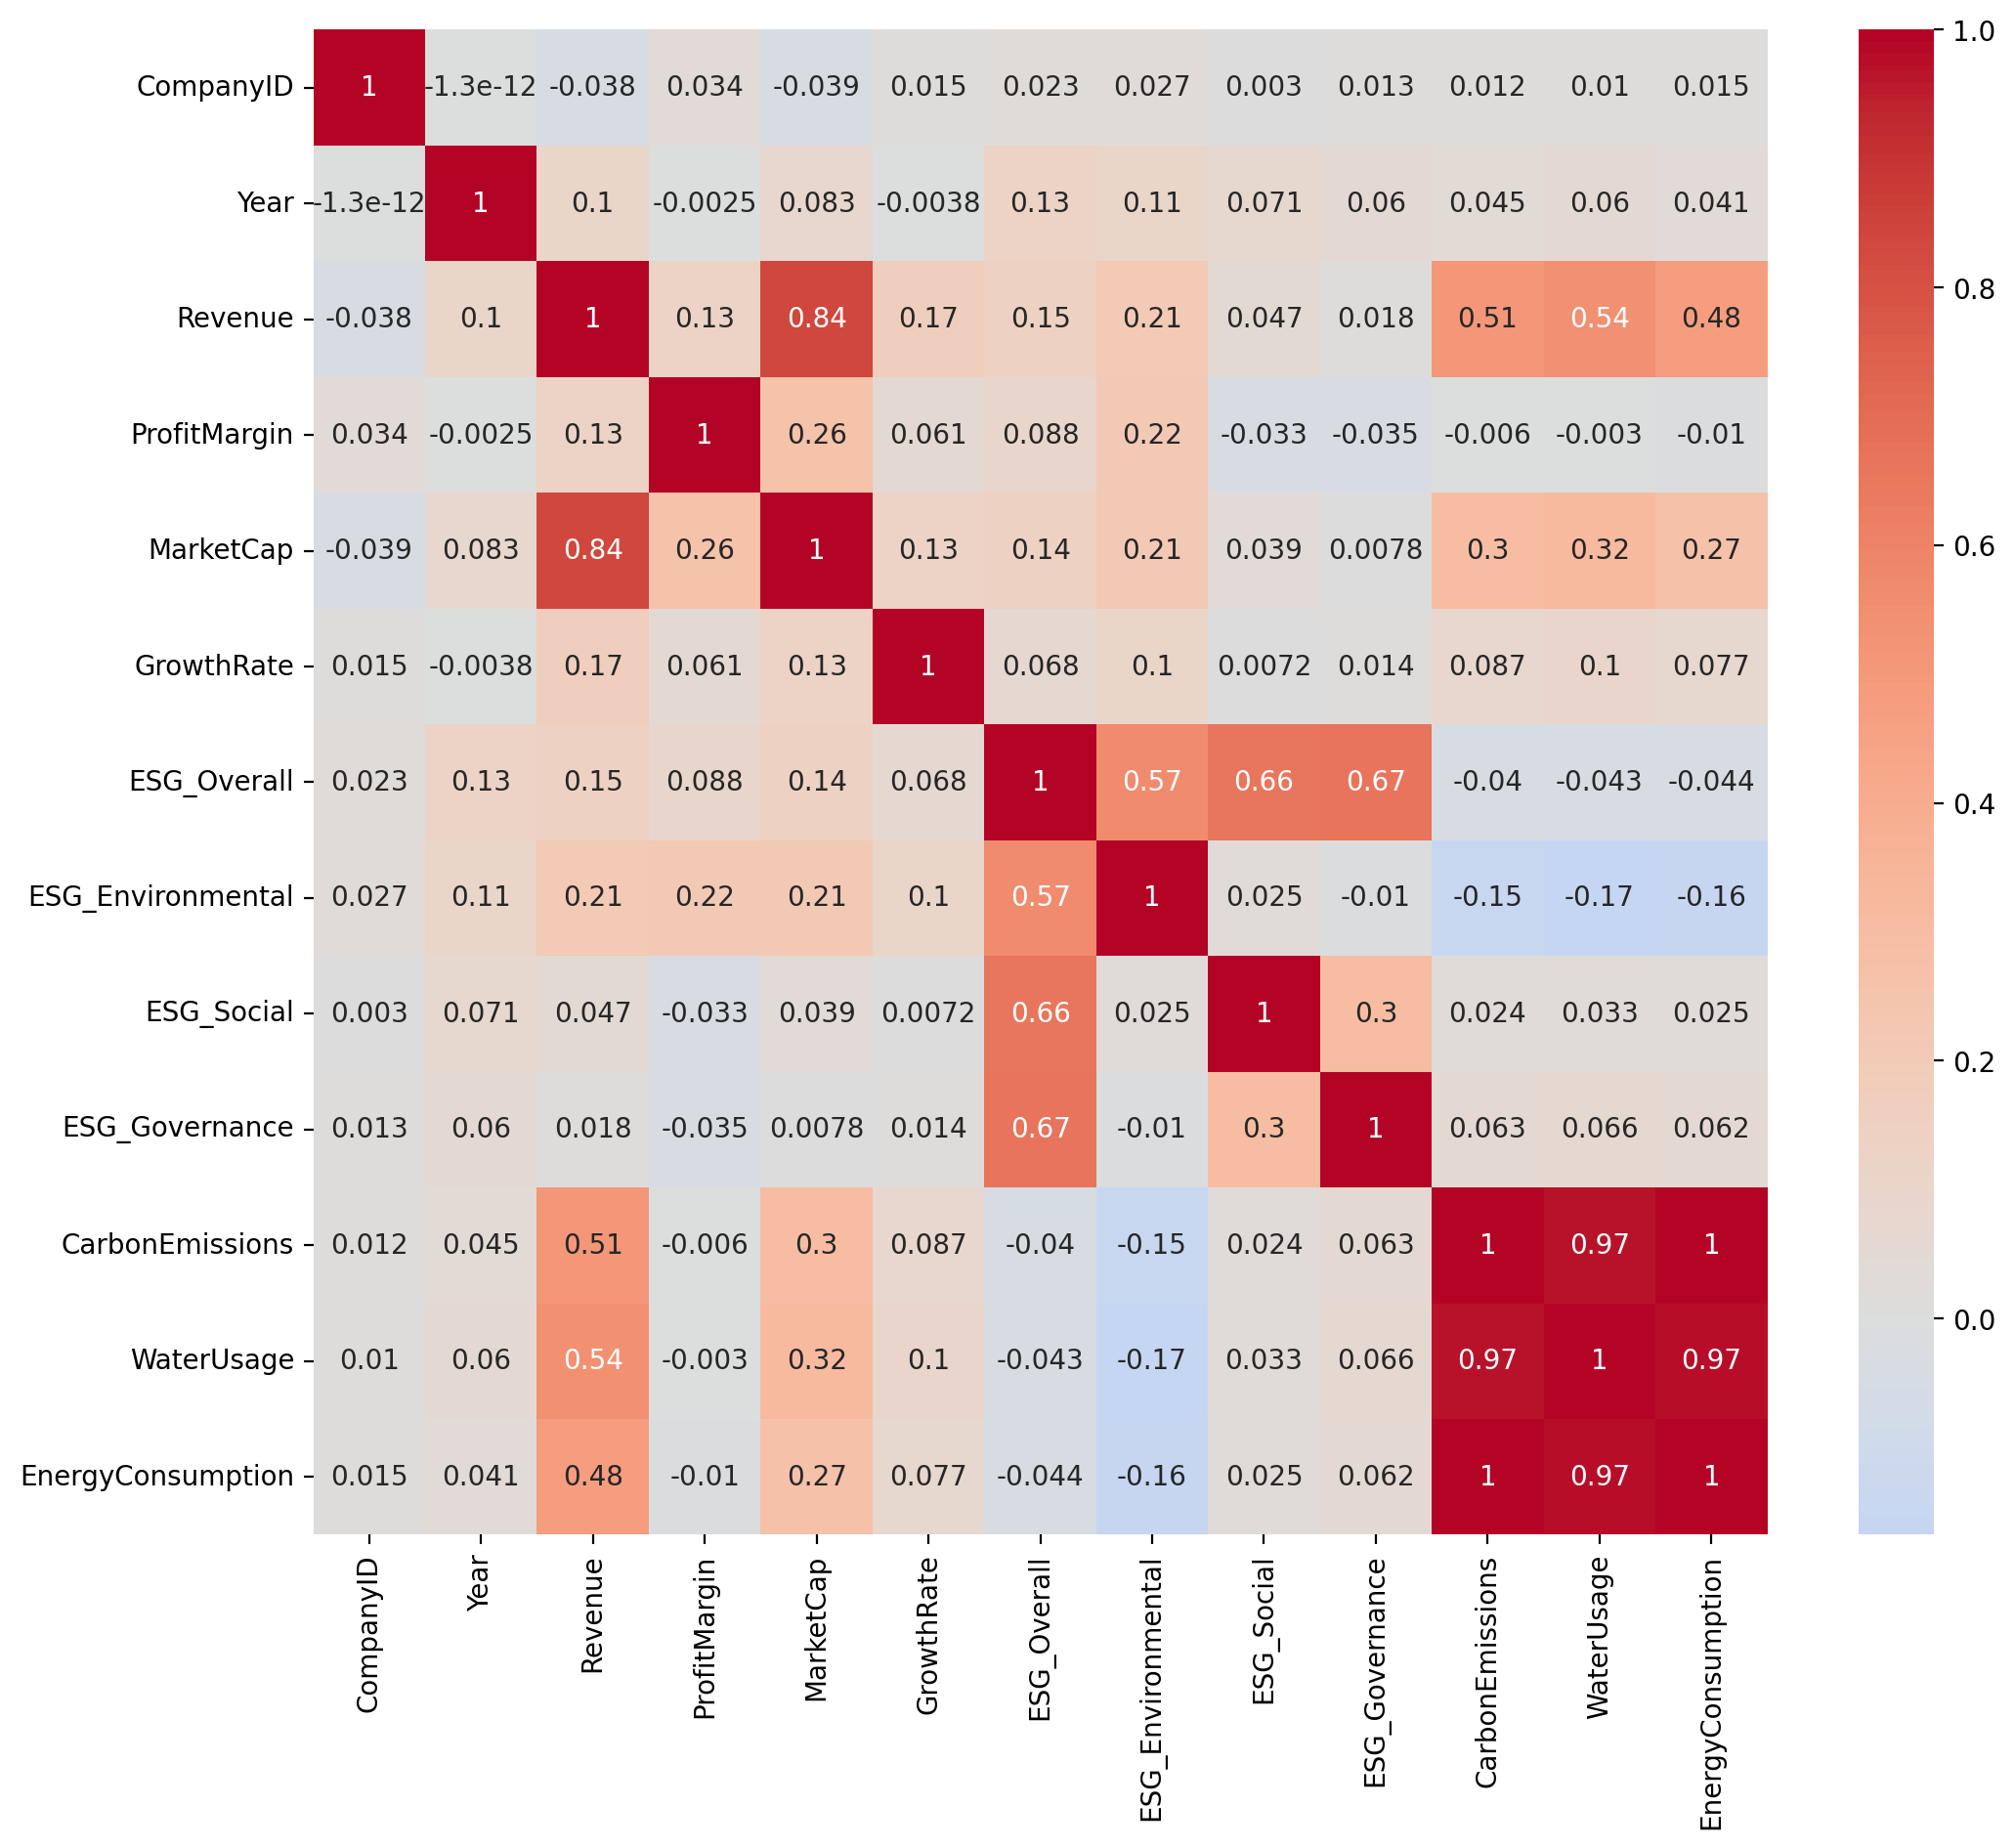

In [6]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=200)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);